<a href="https://colab.research.google.com/github/treezy254/Gun-Deaths-in-the-United-States/blob/master/Gun_Deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
This case study will try to answer the following questions:
• What is the number of annual suicide gun deaths in the 
United States from 2012 to 2014, by gender?

• What is the number of gun deaths by race in the United 
States per 100,000 people from 2012 to 2014?
• What is the annual number of gun deaths in the United 
States on average from 2012 to 2014, by cause?
• What is the percentage per 100,000 people of annual 
gun deaths in the United States from 2012 to 2014, by 
cause?
• What is the percentage of annual suicide gun deaths in 
the United States from 2012 to 2014, by year?
'''

## Data Gathering

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style='white', color_codes=True)
%matplotlib inline

data = pd.read_csv('full_data.csv', index_col=0)
data.index.name = 'Index'
data.columns = map(str.capitalize, data.columns)
data.head() 

,Year,Month,Intent,Police,Sex,Age,Race,Hispanic,Place,Education
Index,,,,,,,,,,
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [3]:
data.shape

(100798, 10)

In [11]:
data_gun = data
data_gun.sort_values(['Year', 'Month'], inplace=True)

In [12]:
data.isnull().any()

Year         False
Month        False
Intent        True
Police       False
Sex          False
Age           True
Race         False
Hispanic     False
Place         True
Education     True
dtype: bool

## Data Analysis


In [20]:
data.describe()

,Year,Month,Police,Age,Hispanic
count,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000
mean,2013.000357,6.567601,0.013909,43.857601,114.179607
std,0.816278,3.405609,0.117114,19.496181,61.595734
min,2012.000000,1.000000,0.000000,0.000000,100.000000
25%,2012.000000,4.000000,0.000000,27.000000,100.000000
50%,2013.000000,7.000000,0.000000,42.000000,100.000000
75%,2014.000000,9.000000,0.000000,58.000000,100.000000
max,2014.000000,12.000000,1.000000,107.000000,998.000000


how many females are in the dataset

In [13]:
data_gun.Sex.value_counts(normalize=False)

M    86349
F    14449
Name: Sex, dtype: int64

How many educated females are included in this 
study?


In [15]:
data_byGender = data_gun.groupby('Sex').count()
data_byGender

,Year,Month,Intent,Police,Age,Race,Hispanic,Place,Education
Sex,,,,,,,,,
F,14449,14449,14449,14449,14446,14449,14449,14386,14243
M,86349,86349,86348,86349,86334,86349,86349,85028,85133


## Data Visualization

<AxesSubplot:title={'center':'Annula U.S. \\suicide gun deaths \n 2012 - 2014, by gender'}>

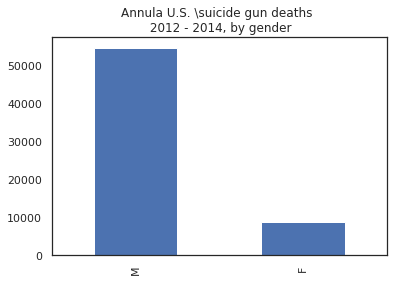

In [16]:
data_suicide_gender = data_gun[data_gun["Intent"] == "Suicide"]
data_suicide_gender.Sex.value_counts(normalize=False).plot.bar(title="Annula U.S. \\suicide gun deaths \n 2012 - 2014, by gender")

<AxesSubplot:title={'center':'Annual U.S Suicide gun deaths \n 2012 - 2014, by gender'}, xlabel='Sex'>

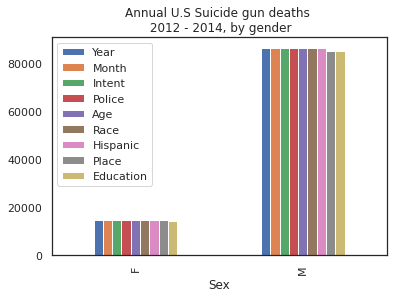

In [21]:
data_byGender.plot.bar(title='Annual U.S Suicide gun deaths \n 2012 - 2014, by gender')

In [29]:
data_byRace = data_gun.groupby('Race')
data_byRace = data_byRace.Race.value_counts(ascending=False)*100/100000
data_byRace.sort_values(ascending=False)

Race                            Race                          
White                           White                             66.237
Black                           Black                             23.296
Hispanic                        Hispanic                           9.022
Asian/Pacific Islander          Asian/Pacific Islander             1.326
Native American/Native Alaskan  Native American/Native Alaskan     0.917
Name: Race, dtype: float64

<AxesSubplot:title={'center':'Percent death toll from guns in the United States \nfrom 2012 to 2014, by race'}, xlabel='Race,Race'>

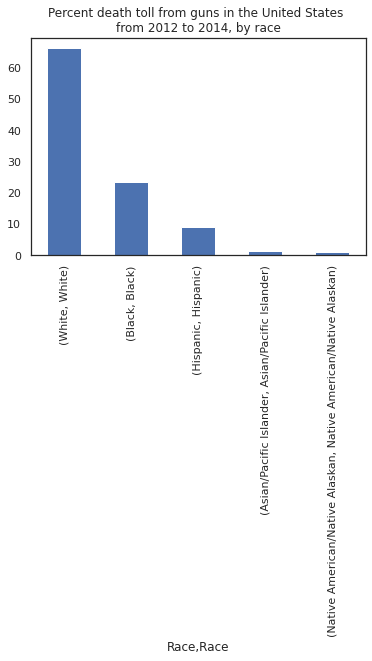

In [31]:
data_byRace.sort_values(ascending=False).plot.bar(title='Percent death toll from guns in the United States \nfrom 2012 to 2014, by race')

What is the number of gun deaths in the United States 
on average from 2012 to 2014, by cause?

In [35]:
data_intent = data_gun.Intent.value_counts(sort=True, ascending=False)

<AxesSubplot:title={'center':'Annual number of gun deaths in the United States on average \n from 2012 to 2014, by cause'}>

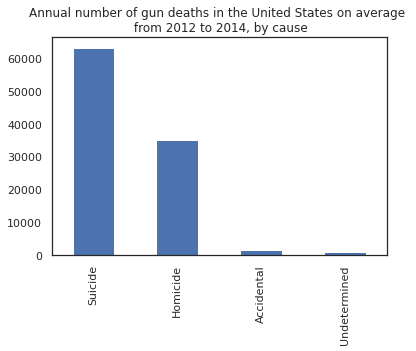

In [36]:
data_intent.plot.bar(title='Annual number of gun deaths in the United States on average \n from 2012 to 2014, by cause')

What is the percentage of suicide gun deaths in the 
United States from 2012 to 2014, by year?

In [39]:
data_suicide = data[data['Intent']=='Suicide']
dataSuicide = data_suicide.Year.value_counts(ascending=False) * 100/100000
dataSuicide.sort_values(ascending=True)

2012    20.666
2013    21.175
2014    21.334
Name: Year, dtype: float64

<AxesSubplot:title={'center':'Percentage of annual suicide gun deaths in the United States \nfrom 2012 - 2014, by year'}>

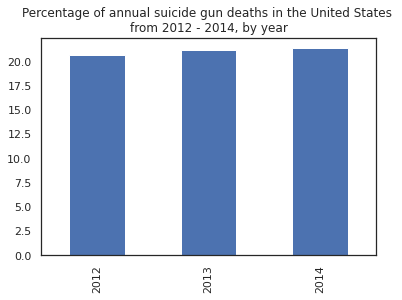

In [40]:
dataSuicide.sort_values(ascending=True).plot.bar(title='Percentage of annual suicide gun deaths in the United States \nfrom 2012 - 2014, by year')

This figure shows almost the same number of suicides each year over three years, which means that its a regular pattern.